# Winning Football Team Prediction

Aim: To design a predictive model capable of accurately predicting if the home team will win

## Procedure

1. Clean the dataset
2. Train-test split on dataset (12 features & 1 target (winning team (Home/Away/Draw))
3. Train 3 classifiers on the data 
- XGBoost
- Logistics Regression
- Support Vector Machine 
4. Utilise the best Classifier to predict the winning team, given an away team and a home team

## History of Football betting

https://qz.com/233830/world-cup-germany-argentina-predictions-microsoft/

In the 2014 World Cup, Bing gave correct predicttions of the outcomes for all 15 games in the knockout round.

https://arxiv.org/pdf/1511.05837.pdf

"It is possible to predict the winner of English county twenty twenty cricket games in nearly two thirds of instances."

https://arxiv.org/pdf/1411.1243.pdf

"Something that becomes clear from the results is that Twitter contains sufficient information to be useful for
predicting outcomes in the Premier League"


#### Questions for our project:

-Which model to use?
-Which features (elements of a game) are the most important for accurately predicting a team victory? Is there an advantage for a team that plays at home?

## Dataset

- 250 million players in over 200 countries play Football (sport with highest popularity worldwide)
- The English Premier League is the most famous domestic team globally
- Retrived dataset from http://football-data.co.uk/data.php


#### Why home team may have higher win rate
- Football is a team sport, cheers from crowds boost morale
- Familarity with pitch and weather conditions is a crucial factor too
- Less Fatigue due to no need for travelling to other countries

In [1]:
conda update -n base -c defaults conda

error: incomplete escape \U at position 28

In [6]:
#data preprocessing
import pandas as pd
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
import xgboost as xgb
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC
#displayd data
from IPython.display import display
%matplotlib inline

In [5]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
# Read data and drop redundant column.
data = pd.read_csv('final_dataset3.csv')

# Preview data.
data = data[data.MW > 3]

data.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'], axis=1)

display(data.head())
# Preview data.
#Full Time Result (H=Home Win, D=Draw, A=Away Win)
#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

#Input - 12 other features (fouls, shots, goals, misses,corners, red card, yellow cards)
#Output - Full Time Result (H=Home Win, D=Draw, A=Away Win) 

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
30,30,2000-09-05,Man United,Bradford,6,0,H,5,2,3,...,0,0,0,0,0,0.50,0.25,0.25,0.25,-19.0
31,31,2000-09-05,Sunderland,West Ham,1,1,D,3,4,5,...,0,0,0,0,0,-0.50,-0.75,0.50,0.50,-8.0
32,32,2000-09-05,Tottenham,Everton,3,2,H,4,5,4,...,0,0,0,0,0,0.00,0.25,0.00,0.00,-4.0
33,33,2000-09-06,Charlton,Southampton,1,1,D,7,6,8,...,0,0,0,0,0,-0.25,-0.25,0.25,0.25,-1.0
34,34,2000-09-06,Chelsea,Arsenal,2,2,D,5,7,5,...,0,0,0,0,0,0.00,0.75,-0.50,-0.50,4.0


## Data Exploration

In [13]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = data.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 7350
Number of features: 42
Number of matches won by home team: 3401
Win rate of home team: 46.27%


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>,
        <Axes: xlabel='DiffLP', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>,
        <Axes: xlabel='DiffLP', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>,
        <Axes: xlabel='DiffLP', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabe

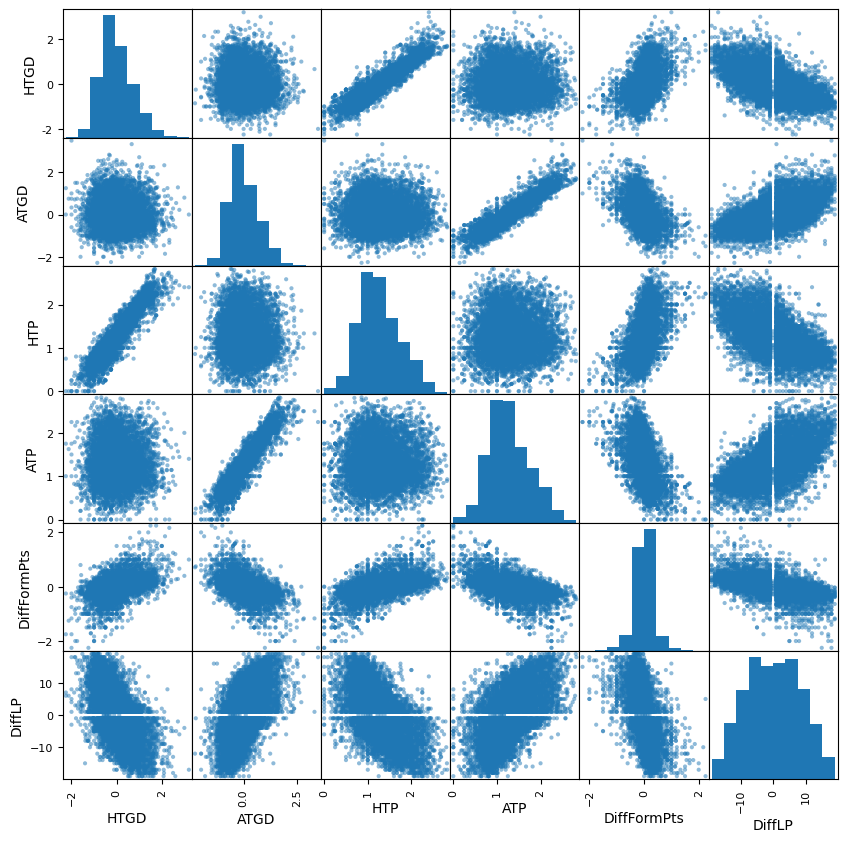

In [14]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))

## Data Prep

In [19]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],axis=1)
y_all = data['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    

In [21]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    # for col, col_data in X.iteritems():

    #     # If data type is categorical, convert to dummy variables
    #     if col_data.dtype == object:
    #         col_data = pd.get_dummies(col_data, prefix = col)
                    
    #     # Collect the revised columns
    #     output = output.join(col_data)
    
    # return output
    for col in X.columns:

        # If data type is categorical, convert to dummy variables
        if X[col].dtype == object:
            col_data = pd.get_dummies(X[col], prefix=col)
            output = pd.concat([output, col_data], axis=1)
        else:
            output[col] = X[col]
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (2839 total features):
['Unnamed: 0', 'Date_2000-09-05', 'Date_2000-09-06', 'Date_2000-09-09', 'Date_2000-09-10', 'Date_2000-09-11', 'Date_2000-09-16', 'Date_2000-09-17', 'Date_2000-09-23', 'Date_2000-09-24', 'Date_2000-09-30', 'Date_2000-10-01', 'Date_2000-10-14', 'Date_2000-10-15', 'Date_2000-10-16', 'Date_2000-10-21', 'Date_2000-10-22', 'Date_2000-10-23', 'Date_2000-10-28', 'Date_2000-10-29', 'Date_2000-11-04', 'Date_2000-11-05', 'Date_2000-11-06', 'Date_2000-11-11', 'Date_2000-11-12', 'Date_2000-11-18', 'Date_2000-11-19', 'Date_2000-11-20', 'Date_2000-11-25', 'Date_2000-11-26', 'Date_2000-12-02', 'Date_2000-12-03', 'Date_2000-12-04', 'Date_2000-12-09', 'Date_2000-12-10', 'Date_2000-12-16', 'Date_2000-12-17', 'Date_2000-12-18', 'Date_2000-12-22', 'Date_2000-12-23', 'Date_2000-12-26', 'Date_2000-12-27', 'Date_2000-12-30', 'Date_2001-01-01', 'Date_2001-01-02', 'Date_2001-01-13', 'Date_2001-01-14', 'Date_2001-01-20', 'Date_2001-01-21', 'Date_2001-01-22', 'Date

In [26]:
# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X_all.head())


Feature values:


,Unnamed: 0,Date_2000-09-05,Date_2000-09-06,Date_2000-09-09,Date_2000-09-10,Date_2000-09-11,Date_2000-09-16,Date_2000-09-17,Date_2000-09-23,Date_2000-09-24,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
30,30,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0.719909,0.340606,0.25,0.25,-2.266902
31,31,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,-0.702611,-1.084379,0.50,0.50,-0.954147
32,32,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0.008649,0.340606,0.00,0.00,-0.476781
33,33,False,True,False,False,False,False,False,False,False,...,0,0,0,0,0,-0.346981,-0.371886,0.25,0.25,-0.118757
34,34,False,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0.008649,1.053099,-0.50,-0.50,0.477950


In [61]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.1,
                                                    random_state = 2,
                                                    stratify = y_all)


## Train and Evaluate Models

In [62]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

print('qwerty')

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))
    print('train_classifie')

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))

    # f1_score(target, y_pred, average='micro')

    print('predict_labels')

    
    return f1_score(target, y_pred,average='micro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    print("Testing a {} using a test set size of {}. . .".format(clf.__class__.__name__, len(X_test)))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))
    print('train_predict')

print('22')
print(clf)

qwerty
22
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [63]:
from sklearn.preprocessing import LabelEncoder

print('1111')
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42, max_iter=1000)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

# train_predict(clf_A, X_train, y_train, X_test, y_test)
# print ('')
# train_predict(clf_B, X_train, y_train, X_test, y_test)
# print ('')
# train_predict(clf_C, X_train, y_train, X_test, y_test)
# print ('')

train_predict(clf_A, X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded)
print('')
train_predict(clf_B, X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded)
print('')
train_predict(clf_C, X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded)
print('')

print('2222')

1111
Training a LogisticRegression using a training set size of 6615. . .
Trained model in 24.9435 seconds
train_classifie
Made predictions in 0.3286 seconds.
predict_labels
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Testing a LogisticRegression using a test set size of 735. . .
Made predictions in 0.0375 seconds.
predict_labels
F1 score and accuracy score for test set: 0.8190 , 0.8190.
train_predict

Training a SVC using a training set size of 6615. . .
Trained model in 233.3169 seconds
train_classifie
Made predictions in 248.9729 seconds.
predict_labels
0.9009826152683296 0.9009826152683296
F1 score and accuracy score for training set: 0.9010 , 0.9010.
Testing a SVC using a test set size of 735. . .
Made predictions in 26.5943 seconds.
predict_labels
F1 score and accuracy score for test set: 0.5619 , 0.5619.
train_predict

Training a XGBClassifier using a training set size of 6615. . .
Trained model in 17.5733 seconds
train_classifie
Made predictions in 0.

**Clearly XGBoost seems like the best model as it has the highest F1 score and accuracy score on the test set.**

# Tune the parameters in XGBoost

![alt text](https://i.stack.imgur.com/9GgQK.jpg "Logo Title Text 1")

In [67]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Assuming y_train and y_test need to be encoded
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'reg_alpha':[1e-5]
             }  

# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# # TODO: Make an f1 scoring function using 'make_scorer' 
# f1_scorer = make_scorer(f1_score,pos_label='H')
# # Create an F1 scoring function
# f1_scorer = make_scorer(f1_score, pos_label=encoder.transform(['H'])[0])  # Ensure 'H' is encoded
# Correct scoring function for multiclass classification
f1_scorer = make_scorer(f1_score, average='macro')  # or 'weighted' depending on your preference



# # TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
# grid_obj = GridSearchCV(clf,
#                         scoring=f1_scorer,
#                         param_grid=parameters,
#                         cv=5)

# # TODO: Fit the grid search object to the training data and find the optimal parameters
# grid_obj = grid_obj.fit(X_train,y_train)

# Perform grid search
# grid_obj = GridSearchCV(clf, scoring=f1_scorer, param_grid=parameters, cv=5)
# grid_obj = grid_obj.fit(X_train, y_train_encoded)

# # Get the estimator
# clf = grid_obj.best_estimator_
# print(clf)

# Perform grid search with corrected scoring function
grid_obj = GridSearchCV(clf, scoring=f1_scorer, param_grid=parameters, cv=5)
grid_obj.fit(X_train, y_train_encoded)  # Ensure data is correctly formatted

# Output the best parameters and the best score
print("Best parameters:", grid_obj.best_params_)
print("Best score:", grid_obj.best_score_)


# Define a function to predict labels and calculate F1 and accuracy
# def predict_labels(clf, features, true_labels):
#     from sklearn.metrics import f1_score, accuracy_score
#     predictions = clf.predict(features)
#     f1 = f1_score(true_labels, predictions, average='macro')  # or 'binary' if two-class
#     acc = accuracy_score(true_labels, predictions)
#     return f1, acc

# # Report the final F1 score for training and testing after parameter tuning
# f1, acc = predict_labels(clf, X_train, y_train)
# print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
# f1, acc = predict_labels(clf, X_test, y_test)
# print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

# # Report scores
# f1, acc = predict_labels(clf, X_train, y_train_encoded)
# print("F1 score and accuracy score for training set: {:.4f}, {:.4f}.".format(f1, acc))
# f1, acc = predict_labels(clf, X_test, y_test_encoded)
# print("F1 score and accuracy score for test set: {:.4f}, {:.4f}.".format(f1, acc))


# Get the best estimator
best_clf = grid_obj.best_estimator_

# Use best_clf for predictions
f1, acc = predict_labels(best_clf, X_train, y_train_encoded)
print("F1 score and accuracy score for training set: {:.4f}, {:.4f}.".format(f1, acc))
f1, acc = predict_labels(best_clf, X_test, y_test_encoded)
print("F1 score and accuracy score for test set: {:.4f}, {:.4f}.".format(f1, acc))


Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 40, 'reg_alpha': 1e-05, 'subsample': 0.8}
Best score: 0.9861806920068963
Made predictions in 3.9640 seconds.
predict_labels
F1 score and accuracy score for training set: 0.9885, 0.9885.
Made predictions in 1.3805 seconds.
predict_labels
F1 score and accuracy score for test set: 0.9878, 0.9878.
